# <center> k-Nearest Neighbor with Grid Search
KNN classifier is trained on feature set 1

## <font color='royalblue'>Get the data

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 3.00880939,  0.26443017,  1.05370334, ...
X_32_val                  -> array([[-0.13964146,  0.53184264, -0.71694033, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[-0.1396414
X_32train_std             -> array([[-0.80277066, -0.49489511, -0.83240094, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[-0.006215
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 3.0088093
X_train                   -> array([[[-0.01174874, -0.00817356, -0.0042913 , ..
X_train_std               -> array([[-0.80277066, -0.49489511, -0.83240094, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([3, 5, 1, ..., 2, 4, 0])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 3, ..
y_32_train                -> array([5, 0, 2, ..., 4, 6, 6])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_train_std.shape, "and labels: ", y_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_test_std), X_test_std[18].shape, "arrays for SNR values:")
print(sorted(X_test_std.keys()))

Training data:  (80000, 16) and labels:  (80000,)
 
Test data:
Total 20 (4000, 16) arrays for SNR values:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## <font color='royalblue'>Train and test the classifier

In [9]:
#Train the classifier

from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [18,19,20], 'weights':['uniform','distance']}

grid_search_cv = GridSearchCV(KNeighborsClassifier(algorithm='auto'), params, verbose=1)

start = time()
grid_search_cv.fit(X_train_std, y_train)
print("Grid search took %.2f minutes "%((time() - start)//60))
print("   ")
print("Result of grid search, best estimator:")
print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Grid search took 7.00 minutes 
   
Result of grid search, best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='distance')


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  8.0min finished


In [4]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy = defaultdict(list)

print("Test the classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = grid_search_cv.predict(X_test_std[snr])
    accuracy[snr] = metrics.accuracy_score(y_test[snr], y_pred[snr])
    print("k-Nearest Neighbor's Accuracy on %d dB SNR samples = "%(snr), accuracy[snr])   
    
accuracy = collections.OrderedDict(sorted(accuracy.items()))  #sort by ascending SNR values

Test the classifier
 
k-Nearest Neighbor's Accuracy on -20 dB SNR samples =  0.12275
k-Nearest Neighbor's Accuracy on -18 dB SNR samples =  0.13125
k-Nearest Neighbor's Accuracy on -16 dB SNR samples =  0.13375
k-Nearest Neighbor's Accuracy on -14 dB SNR samples =  0.1275
k-Nearest Neighbor's Accuracy on -12 dB SNR samples =  0.142
k-Nearest Neighbor's Accuracy on -10 dB SNR samples =  0.16425
k-Nearest Neighbor's Accuracy on -8 dB SNR samples =  0.23125
k-Nearest Neighbor's Accuracy on -6 dB SNR samples =  0.29325
k-Nearest Neighbor's Accuracy on -4 dB SNR samples =  0.345
k-Nearest Neighbor's Accuracy on -2 dB SNR samples =  0.34125
k-Nearest Neighbor's Accuracy on 0 dB SNR samples =  0.41575
k-Nearest Neighbor's Accuracy on 2 dB SNR samples =  0.54375
k-Nearest Neighbor's Accuracy on 4 dB SNR samples =  0.637
k-Nearest Neighbor's Accuracy on 6 dB SNR samples =  0.64575
k-Nearest Neighbor's Accuracy on 8 dB SNR samples =  0.65575
k-Nearest Neighbor's Accuracy on 10 dB SNR samples =  

## <font color='royalblue'> Visualize classifier performance

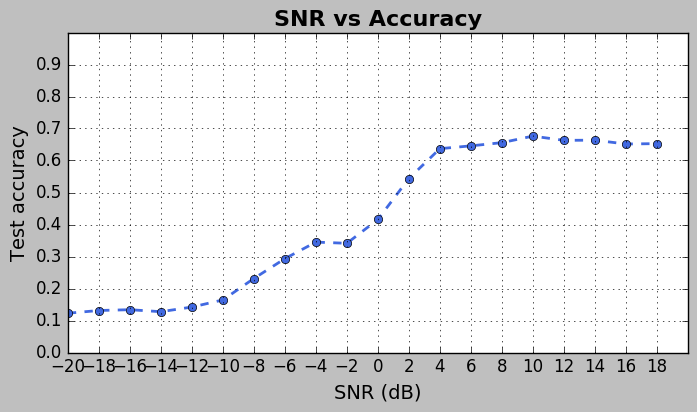

In [5]:
plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

In [4]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
y_predicted = grid_search_cv.predict(X_test_std[18])
conf_matrix = confusion_matrix(y_predicted, y_test[18]) 

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix Without Normalization")
print(df)

Confusion Matrix Without Normalization
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK    220     1      2     8     2     52     46   117
BPSK      1   486      0     0    21      7      9     5
CPFSK    71     2    448   118     0     16     11    72
GFSK     18     0     48   362     1     14     16    15
PAM4      0    11      0     0   474      9      4     0
QAM16    19     0      0     0     1    153    160    21
QAM64    22     0      0     0     1    199    218    20
QPSK    149     0      2    12     0     50     36   250


Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.49  0.00   0.00  0.02  0.00   0.12   0.10  0.26
BPSK   0.00  0.92   0.00  0.00  0.04   0.01   0.02  0.01
CPFSK  0.10  0.00   0.61  0.16  0.00   0.02   0.01  0.10
GFSK   0.04  0.00   0.10  0.76  0.00   0.03   0.03  0.03
PAM4   0.00  0.02   0.00  0.00  0.95   0.02   0.01  0.00
QAM16  0.05  0.00   0.00  0.00  0.00   0.43   0.45  0.06
QAM64  0.05  0.00   0.00  0.00  0.00   0.43   0.47  0.04
QPSK   0.30  0.00   0.00  0.02  0.00   0.10   0.07  0.50


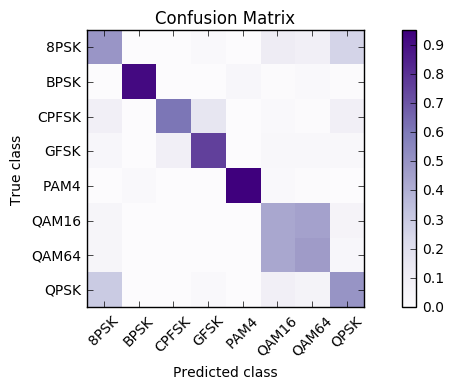

In [6]:
# Normalize the matrix

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

import pandas as pd

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

In [16]:
from sklearn.externals import joblib

joblib.dump(grid_search_cv, "knn3.pkl")

['knn3.pkl']

In [3]:
import pickle
from sklearn.externals import joblib
grid_search_cv = joblib.load("knn3.pkl")